In [1]:
# libraries needed for data analysis, pre-processing, visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# output plots right below the cell input command
%matplotlib inline 
# standarization and normalization might be needed, and convertor needed for categorical variables 
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer, OneHotEncoder
# libraries needed for training, testing, building the model, and prediction
from sklearn.model_selection import train_test_split
# libraries needed for cross validation procedure
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
# libraries for the chosen algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
# libraries needed for model tuning
from sklearn.model_selection import GridSearchCV
# libraries needed for evaluation - metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# use for detecting multicolinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statistics import mean

In [2]:
############################################# Data collection #################################################################
# read the csv file and create a dataframe

# overriding column names to a more conventional, understandable one
cols = ['age', 'work_class', 'final_weight', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 
        'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']
# read the csv file as a dataset
df = pd.read_csv("adult.csv", header = 0, names = cols)
# print the shape of the dataset rows x cols
df.shape

(32561, 15)

In [3]:
#################################### Data analysis, pre-processing & Visualiation #############################################
# print information about the dataset
df.info()
# print first 5 rows of the dataset
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   work_class      32561 non-null  object
 2   final_weight    32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


,age,work_class,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
# check for missing values / NA 
df.isna().sum()

age               0
work_class        0
final_weight      0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [5]:
# NA values are the '?' characters if we look closely
# replace those values with actual NA and save the dataset
df.replace('?', np.nan, inplace = True)

In [6]:
# check again for NA values
df.isnull().sum()

age                  0
work_class        1836
final_weight         0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

In [7]:
# workclass, occupation, and native country should not be dropped, i.e., low percentage of na values relatively to
# the total no. of entries
# so just drop the rows where there are na values
df.dropna(inplace = True)
# check the changes
df.isnull().sum()

age               0
work_class        0
final_weight      0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [8]:
# look for duplicated rows
df.duplicated().sum()

23

In [9]:
# drop the row duplicates and save the dataset
df.drop_duplicates(inplace = True)
# check the changes
print(df.duplicated().sum())
# get 5 rows to have a look on the current dataframe
df.head()

0


,age,work_class,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


In [10]:
# reset indexing of rows for avoiding future errors after dropping columns
df.reset_index(drop = True, inplace = True)
df.head()

,age,work_class,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
1,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
2,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
3,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
4,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


In [11]:
# find symmetry, asymmetry in the columns
# find skewness of continous / numerical columns that will help us further to find outliers
skewnessBefore = df.skew(numeric_only = True)
print(skewnessBefore)

age                0.528971
final_weight       1.460055
education_num     -0.302845
capital_gain      11.898104
capital_loss       4.524409
hours_per_week     0.332386
dtype: float64


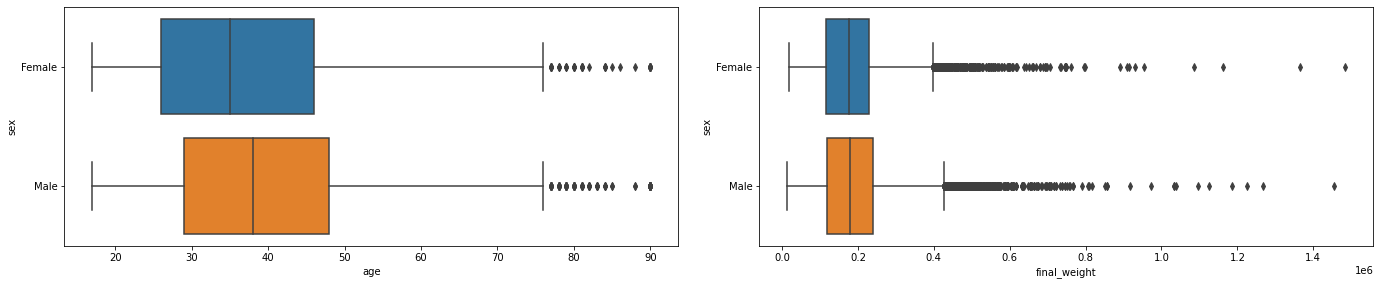

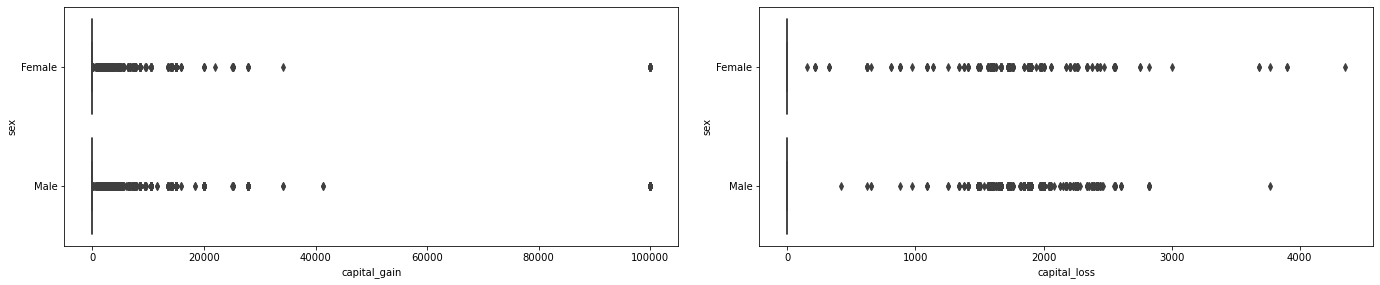

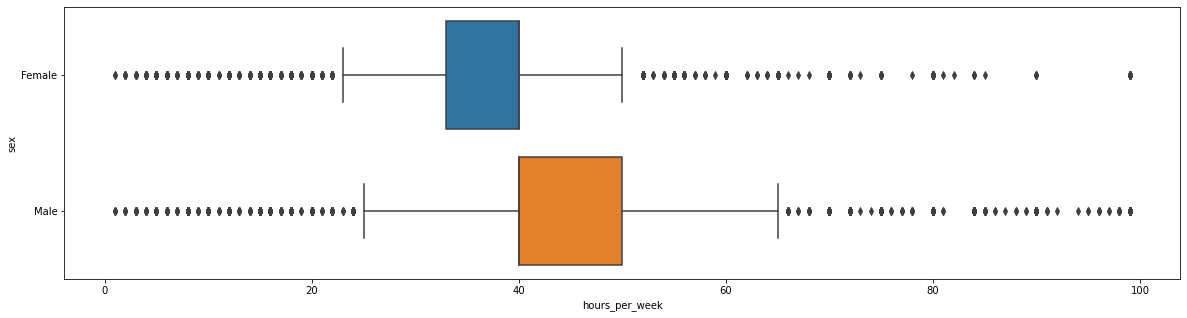

In [12]:
# identifying outliers for age, final_weight, education_num, capital_gain, capital_loss, hours_per_week
# using boxplots 
# from the previous output we deduced that:
# age is moderately skewed
# final_weight is highly skewed
# education_num is fairly symmetrical
# capital_gain is highly skewed
# capital_loss is highly skewed
# hours_per_week is fairly symmetrical

# for each column print print a boxplot according to sex category, in this case we want to print 2 boxplots aside
# make a function, because we might use it later to check the changes to print at least 2 boxplot, no more than that
def plotSkewness(temp_df, cols):
    for i in range(0, len(cols), 2):
        # the last boxplot does not have anything aside if it is an odd number of plots
        if (i != 0 and i == len(cols) - 1 and len(cols) % 2 != 0):
            # frame / figure for the last boxplot
            fig, ax = plt.subplots(1, 1, figsize = (20, 5))
            sns.boxplot(data = temp_df, x = skewedCols[i], y = 'sex')
        elif (i >= 0 and i <= len(cols) - 2 and len(cols) >= 2):
            # frame / figure for the 4 boxplots printed
            fig, ax = plt.subplots(1, 2, figsize = (20, 5))
            fig.tight_layout(pad = 5)
            # plot the first boxplot
            sns.boxplot(data = temp_df, x = cols[i], y = 'sex', ax = ax[0])
            # plot the second boxplot next to the previous one
            sns.boxplot(data = temp_df, x = cols[i + 1], y = 'sex', ax = ax[1])
            
skewedCols = ['age', 'final_weight', 'capital_gain', 'capital_loss', 'hours_per_week']
plotSkewness(df, skewedCols)

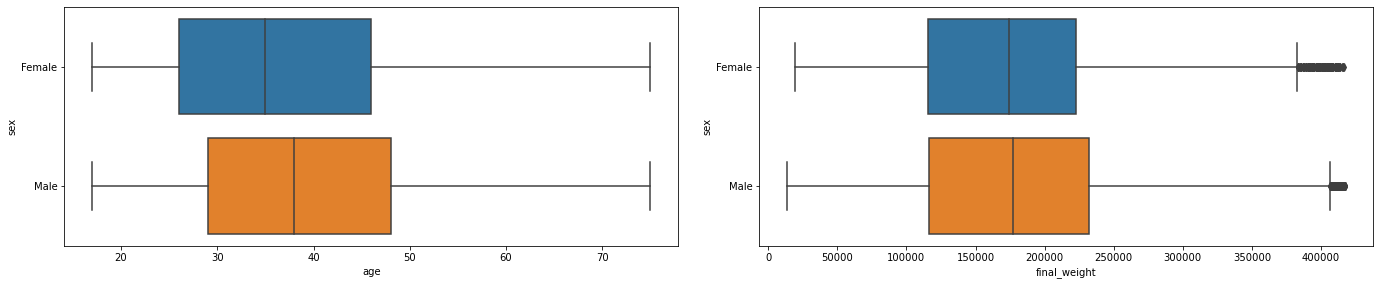

In [13]:
# after having a clear look on the above plots, and we can say that skewness of the cols stated above can be deduced by 
# finding the exact indices of the outliers using the IQR procedure
# of course boxplots helped us (visually) but IQR procedure is the most trustable one / mechanism behind the boxplot

# automate the process for the cols specified using a function and a loop to remove them
# we'll use it later as well
def removeOutliers(temp_df, cols):
    for i in cols:
        # lower quartile
        Q1 = np.percentile(temp_df[i], 25, interpolation = 'midpoint')
        # upper quartile
        Q3 = np.percentile(temp_df[i], 75, interpolation = 'midpoint')

        # calculate the interquartile
        IQR = Q3 - Q1

        # look for the outliers that are over upper boundary
        upper = np.where(temp_df[i] >= (Q3 + 1.5 * IQR))
        # look for the outliers that are below the lower boundary
        lower = np.where(temp_df[i] <= (Q1 - 1.5 * IQR))

        # upper and lower is an array inside of a tuple, just get the array out
        upper = upper[0]
        lower = lower[0]

        # remove outliers using the arrays obtained from above
        # drop outliers above upper boundary
        df.drop(upper, axis = 0, inplace = True)
        
        # drop outliers below lower boundary
        df.drop(lower, axis = 0, inplace = True)
        
        # removing rows will change indexing, so reset it each time
        df.reset_index(drop = True, inplace = True)
        
# specify which cols to remove outliers
# we'll deal with capital_gain and capital_loss a bit later
colsOutliers = ['age', 'final_weight']
removeOutliers(df, colsOutliers)
# now let's see the changes of the skewness
plotSkewness(df, colsOutliers)

[Text(0.5, 1.0, 'capital_gain > 0')]

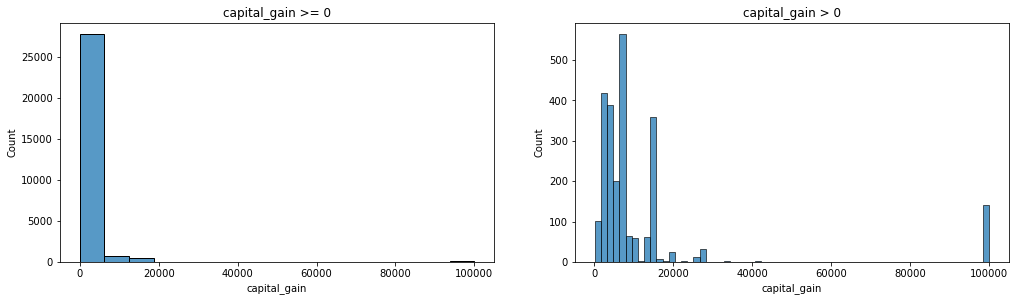

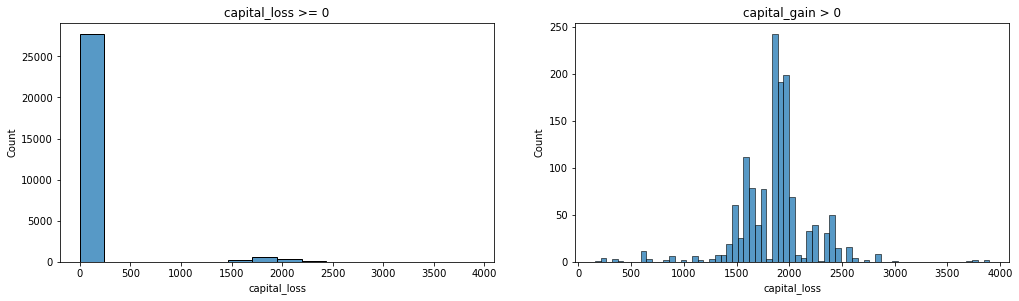

In [14]:
# from the previous plots, we can see that now age and final_weight are fairly symmetrical
# capital_gain and capital_loss outliers are a different case
# our boxplots for these two columns actually show that the interquartile range is 0 meaning, that there is no variability
# in the middle 50 % but center of distribution can be anywhere

# select rows and columns for capital_gain and capital_loss that are not 0
capitalGain = df.loc[df['capital_gain'] != 0]
capitalLoss = df.loc[df['capital_loss'] != 0] 
 
# we want to visualize entries capital_gain and capital_loss values that are 0 and values that are not 0 using 
# a histogram chart

# capital_gain
# frame for the hisogram charts  
fig, ax = plt.subplots(1, 2, figsize = (15, 5))
# increase padding of the figure
fig.tight_layout(pad = 5)
# plot capital_gain values >= 0
sns.histplot(data = df, x = df['capital_gain'], ax = ax[0]).set(title = 'capital_gain >= 0')
# plot capital_gain values >= 0 aside to the previous plot
sns.histplot(data = capitalGain, x = capitalGain['capital_gain'], ax = ax[1]).set(title = 'capital_gain > 0')

# capital_loss
# frame for the hisogram charts  
fig, ax = plt.subplots(1, 2, figsize = (15, 5))
# increase padding of the figure
fig.tight_layout(pad = 5)
# plot capital_loss values >= 0
sns.histplot(data = df, x = df['capital_loss'], ax = ax[0]).set(title = 'capital_loss >= 0')
# plot capital_loss values > 0 aside to the previous plot
sns.histplot(data = capitalLoss, x = capitalLoss['capital_loss'], ax = ax[1]).set(title = 'capital_gain > 0')

<AxesSubplot:xlabel='capital_loss', ylabel='sex'>

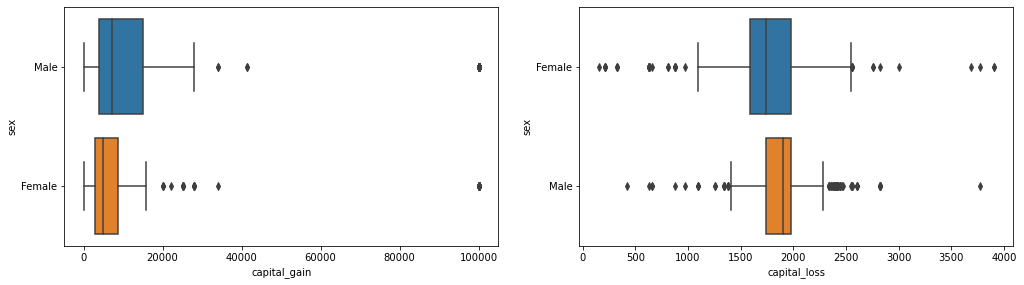

In [15]:
# as we can see from the from the histograms above of capital_gain and capital_loss
# the number of variable counts that have a value not equal to 0 is really low relatively to the variables 
# that have a value of 0 (almost the entire dataset)
# no wonder the IQR range of the boxplots of these two columns is 0, i.e., both have more than 50% of values equal to 0

# let's boxplot these two columns
# frame for the boxplots of capital_gain and capital_loss
fig, ax = plt.subplots(1, 2, figsize = (15, 5))
fig.tight_layout(pad = 5)
# plot capital_gain
sns.boxplot(data = capitalGain, x = df['capital_gain'], y = capitalGain['sex'], ax = ax[0])
# plot capital_loss next to previous plot
sns.boxplot(data = capitalLoss, x = df['capital_loss'], y = capitalLoss['sex'], ax = ax[1])

In [16]:
# obviously, we do not want to delete outliers with value 0, these are true outliers, i.e., we expect people
# to have capital_gain and capital_loss equal to 0 in a year
# check the skewness of capital_gain and capital_loss for the range of values that are not equal to 0 and print them
# these are the ranges where we can look for outliers
print("capital_gain skewness:", capitalGain['capital_gain'].skew())
print("capital_loss skewness: ", capitalLoss['capital_loss'].skew())

capital_gain skewness: 3.437723971273536
capital_loss skewness:  -0.27403034368049717


In [17]:
# as we can see that do not want to modify capital_loss because is fairly symmetrical but for 
# capital_gain is >= 999999 so we remove them 
dropRows = np.where(df['capital_gain'] >= 99999)
df.drop(dropRows[0], inplace = True)

In [18]:
# skewness after removing outliers
skewnessAfter = df.skew(numeric_only = True)
print(skewnessAfter)

age               0.406937
final_weight      0.413253
education_num    -0.294730
capital_gain      5.717926
capital_loss      4.467263
hours_per_week    0.352044
dtype: float64


[Text(0.5, 1.0, 'Skewness after')]

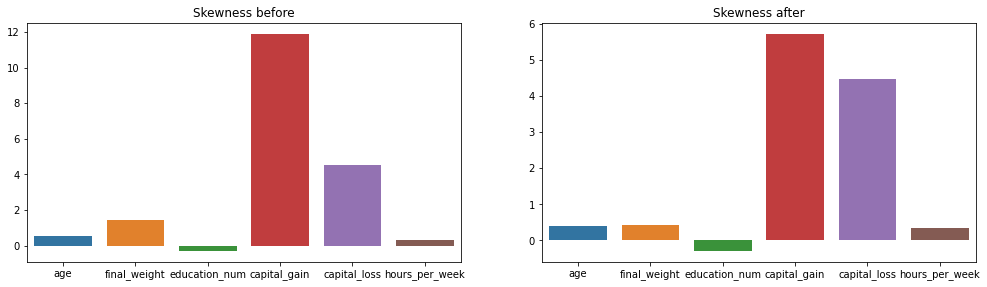

In [19]:
# let's compare the skewness before and after removing the outliers
# convert the skewness pandas arrays to dictionaries
dict_skewnessBefore = dict(skewnessBefore)
dict_skewnessAfter = dict(skewnessAfter)

# convert dictionaries' key and values to lists
keysBefore = list(dict_skewnessBefore.keys())
valsBefore = list(dict_skewnessBefore.values())

keysAfter = list(dict_skewnessAfter.keys())
valsAfter = list(dict_skewnessAfter.values())

# barplot them
fig, ax = plt.subplots(1, 2, figsize = (15, 5))
fig.tight_layout(pad = 5)
sns.barplot(x = keysBefore, y = valsBefore, ax = ax[0]).set(title = 'Skewness before')
sns.barplot(x = keysAfter, y = valsAfter, ax = ax[1]).set(title = 'Skewness after')

In [20]:
# as we can see above we have reduced capital loss and gain skewness
# convert categorical variables to indicator variables stage
l = list(df.select_dtypes(include = object))
print(len(l))

9


In [21]:
# we have 9 string objects
print(l)

['work_class', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']


In [22]:
# let's have a look ...
df.head()

,age,work_class,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
1,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
2,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
3,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
4,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K


In [23]:
# Dealing with categorical features
# each categorical class has at least >= 2 levels, which method to use for converting (One hot encoding)?
# education column is ordinal which would need to be encoded
# education-num is the equivalent of education, i.e., the highest level of education achieved represented in numerical form
# so we just drop education column
df.drop(['education'], axis = 1, inplace = True)

# remove the categorical cols
# using one hot encoding
# select all nominal columns for encoding 
nominal_cols = ['work_class', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']
df_nominal = df[nominal_cols]
# format the encoding output as a matrix, and drop the the first level of a categorical to avoid dummy variable trap
encoder = OneHotEncoder(drop = 'first', dtype = int, handle_unknown = 'ignore')
# transform the selected column to numerical
df_nominal = encoder.fit_transform(df_nominal).toarray()
# convert it back to a dataframe
df_nominal = pd.DataFrame(df_nominal)

# drop the categorical columns that have been encoded
df.drop(nominal_cols, axis = 1, inplace = True)

# concatenate the original dataframe with the one that contains the encoded categorical variables and keep the data types 
# preserved
df = pd.concat([df, df_nominal], axis = 1, join = 'inner')

In [24]:
# let's see the outcome
df.head()

,age,final_weight,education_num,capital_gain,capital_loss,hours_per_week,0,1,2,3,...,66,67,68,69,70,71,72,73,74,75
0,54,140359,4,0,3900,40,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,41,264663,10,0,3900,40,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,34,216864,9,0,3770,45,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,38,150601,6,0,3770,40,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,74,88638,16,0,3683,20,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


[Text(0.5, 1.0, 'income > 50K')]

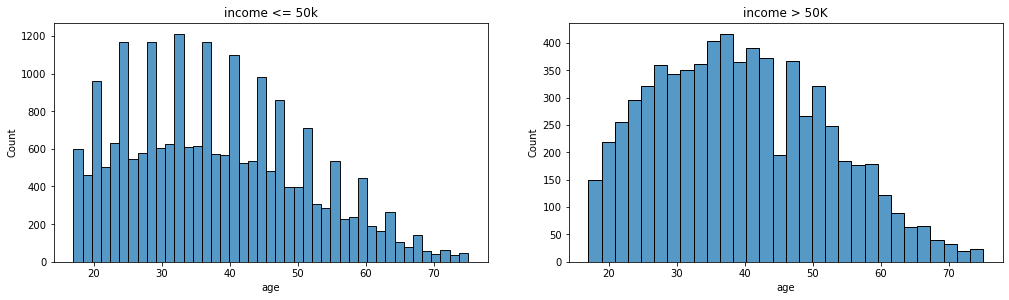

In [25]:
# count no of people with income <= 50k or > 50k
incomeBelow_50k = df[df[75] == 0]
incomeAbove_50k = df[df[75] == 1]

# now let's barplot the number of people that have income > 50k and those <= 50k by age
fig, ax = plt.subplots(1, 2, figsize = (15, 5))
# increase padding of the figure
fig.tight_layout(pad = 5)
# plot income values <= 50k
sns.histplot(data = incomeBelow_50k, x = incomeBelow_50k['age'],  ax = ax[0]).set(title = 'income <= 50k')
# plot capital_loss values > 50k aside to the previous plot
sns.histplot(data = incomeAbove_50k, x = incomeAbove_50k['age'], ax = ax[1]).set(title = 'income > 50K')

In [26]:
print("People with income below or equal to 50k: ", len(incomeBelow_50k))
print("Peple with income above 50K: ", len(incomeAbove_50k))
# we can see in the above barplots the income class is imbalanced, i.e. a much higher portion are people with income <= 50K
# this can lead to overfitting 

People with income below or equal to 50k:  21793
Peple with income above 50K:  6997


<AxesSubplot:>

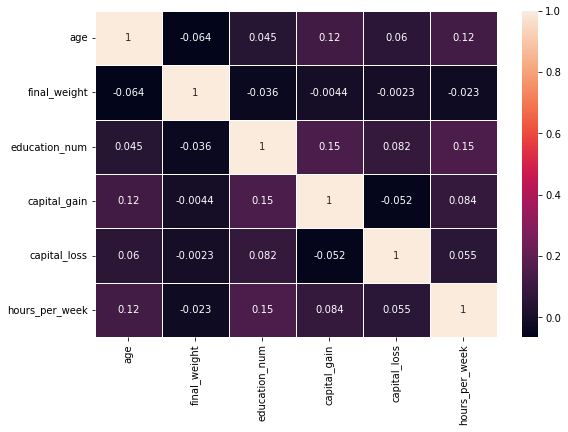

In [27]:
# let's check the correlation between columns, and use a heatmap to visualize the volume of locations in a dataset
# it will help us to decide which areas to visualize that matter most

df_cp = df[['age', 'final_weight', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']] 
corr_matrix = df_cp.corr()

# plot a heatmap of the dataframe
fig, ax = plt.subplots(figsize = (9, 6))
sns.heatmap(corr_matrix, annot = True, linewidths = .5, ax = ax)

In [28]:
# we can see that in the above heatmap we have a weak relationship among columns (non categorical), 
# values are close to 0; there is slighltlyl colinearity for hours_per_week and education_num 
# for obvious reasons, we don't want to plot all the encoded categorical columns due to runtime reasons
# let's find colinearity for the entire dataset features using Variance Inflation Factor
  
# VIF dataframe
x = ['age', 'final_weight', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']
for i in range(0, 76):
    x.append(i)
x = df[x]
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
  
print(vif_data)

          feature         VIF
0             age   10.308634
1    final_weight    5.233650
2   education_num   17.984017
3    capital_gain    1.212978
4    capital_loss    1.107540
..            ...         ...
77             71    1.171596
78             72  260.165541
79             73    1.741118
80             74    1.152467
81             75    2.036704

[82 rows x 2 columns]


In [29]:
# again, we can also see how high is the colinearity among encoded categorical features, which clearly 
# indicates the imbalance of the dataset, i.e. it is not equally distributed 
df.skew()

age               0.406730
final_weight      0.413915
education_num    -0.293204
capital_gain      5.702800
capital_loss      4.454689
                   ...    
71               41.118198
72               -2.958146
73               21.139833
74               43.778232
75                1.198264
Length: 82, dtype: float64

In [30]:
#################################### Creating the model, training, testing, and predicting #####################################

# select indepent columns for x, and for y, the dependent column, the income
# so we want to predict the income, if people earn over 50k or not
X = df.iloc[1:, :-1].values
y = df.iloc[1:, -1].values

# split the dataset into training set (75%) and testing set (25%), and give same result if running again, i.e. random state
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 80, test_size = 20, random_state = 0)

# standardization of the data will help us to get a better better performance, i.e., scaling the train/test set to the same
# standards
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


# creating the models, training, and testing them (prediction)
# Logistic Regression : Using one v all (for binary problem according to sklearn) 
# uses cross-entropy loss function 
# we use class weight that will help us deal with our imbalanced occurences of classes
lr = LogisticRegression(multi_class = 'ovr', solver = 'lbfgs', class_weight = 'balanced', random_state = 1, max_iter = 1000)
# fit the training set onto the model
lr.fit(X_train, y_train)
# predict with the training set itself / data seen
y_train_pred_lr = lr.predict(X_train) 
# predict with the testing set / unseen data
y_test_pred_lr = lr.predict(X_test)

# k-NN : looking for k nereast neighbors
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
y_train_pred_knn = knn.predict(X_train)
y_test_pred_knn = knn.predict(X_test)

[Text(0.5, 1.0, 'Testing set k-NN')]

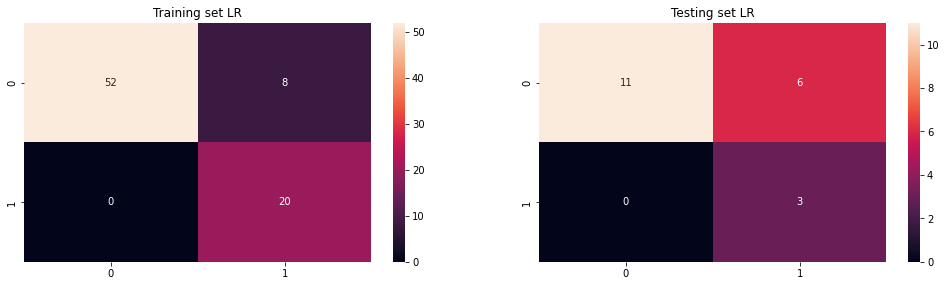

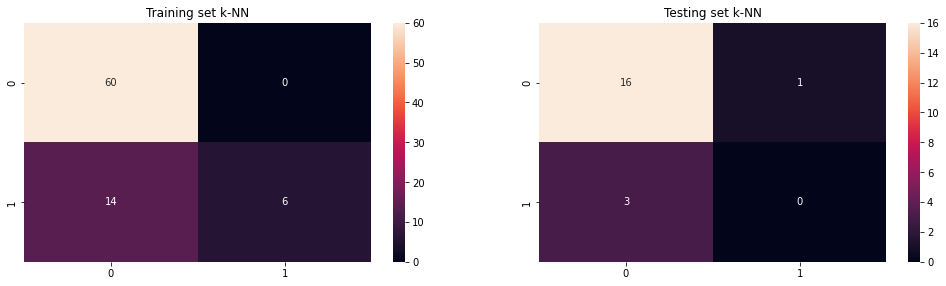

In [31]:
# Evaluating the models
# these initialized models will be used later on for tuning 
# logistic regression
# cf matrix on seen data
cmatrix_lr_train = confusion_matrix(y_train, y_train_pred_lr)
# cf matrix on unseen data
cmatrix_lr_test = confusion_matrix(y_test, y_test_pred_lr)

fig, ax = plt.subplots(1, 2, figsize = (15, 5))
# increase padding of the figure
fig.tight_layout(pad = 5)
sns.heatmap(cmatrix_lr_train, annot = True, ax = ax[0]).set(title = 'Training set LR')
sns.heatmap(cmatrix_lr_test, annot = True, ax = ax[1]).set(title = 'Testing set LR')

# K-NN Model
cmatrix_knn_train = confusion_matrix(y_train, y_train_pred_knn)
cmatrix_knn_test = confusion_matrix(y_test, y_test_pred_knn)

fig1, ax1 = plt.subplots(1, 2, figsize = (15, 5))
# increase padding of the figure
fig1.tight_layout(pad = 5)
sns.heatmap(cmatrix_knn_train, annot = True, ax = ax1[0]).set(title = 'Training set k-NN')
sns.heatmap(cmatrix_knn_test, annot = True, ax = ax1[1]).set(title = 'Testing set k-NN')

In [32]:
# we get the following from regarding the logistic regression model and knn
# get the classification report and convert it to a dictionary
lr_report = classification_report(y_test, y_test_pred_lr, output_dict = True)
# convert it to a dataframe by transposing it
lr_report_df = pd.DataFrame(lr_report).transpose()

knn_report = classification_report(y_test, y_test_pred_knn, output_dict = True)
knn_report_df = pd.DataFrame(knn_report).transpose()

In [33]:
lr_report_df.head()

,precision,recall,f1-score,support
0,1.000000,0.647059,0.785714,17.0
1,0.333333,1.000000,0.500000,3.0
accuracy,0.700000,0.700000,0.700000,0.7
macro avg,0.666667,0.823529,0.642857,20.0
weighted avg,0.900000,0.700000,0.742857,20.0


In [34]:
knn_report_df.head()

,precision,recall,f1-score,support
0,0.842105,0.941176,0.888889,17.0
1,0.000000,0.000000,0.000000,3.0
accuracy,0.800000,0.800000,0.800000,0.8
macro avg,0.421053,0.470588,0.444444,20.0
weighted avg,0.715789,0.800000,0.755556,20.0


In [35]:
# defined a function for printing the evaluation results
print("Logistic Regression accuracy in training: ", accuracy_score(y_train, y_train_pred_lr))
print("Logistic Regression accuracy in testing: ", lr.score(X_test, y_test))
print("k-NN in training: ", accuracy_score(y_train, y_train_pred_knn))
print("k-NN in testing: ", knn.score(X_test, y_test))

Logistic Regression accuracy in training:  0.9
Logistic Regression accuracy in testing:  0.7
k-NN in training:  0.825
k-NN in testing:  0.8


In [36]:
# We can conclude that we are dealing with an imbalanced dataset, proved by the visual and numerical outputs from above, and
# through the approach of removing the outliers
# So how should we approach this issue? By using k-Fold Cross Validation resampling procedure instead of using the 
# the usual train/test split procedure where we would have trained the model first and then testing it

# let's standardize the independent data for cross validation and future tuning
X = scaler.transform(X)

# we will use the models' initialized above
# we chose k to be 10 as recommmended value found through experimentation
# this is the number to split the data into k groups through a built-in function of scitkit learn
# let's start by using the built-in function to split the data into 10 groups and suffle data for the 3 iterations
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)
scores_lr = cross_validate(lr, X, y, cv = cv, return_train_score = True)

In [37]:
# cross validation for knn model, will return a dict with train and test score same for lr model
scores_knn = cross_validate(knn, X, y, cv = cv, return_train_score = True)

In [38]:
# print the scores after validation
print("Logistic Regression training score: ", mean(scores_lr['train_score']))
print("Logistic Regression testing score: ", mean(scores_lr['test_score']))
print("k-NN training score: ", mean(scores_knn['train_score']))
print("k-NN testing score: ", mean(scores_knn['test_score']))

Logistic Regression training score:  0.7793511655149966
Logistic Regression testing score:  0.777889702037463
k-NN training score:  0.8714902707837653
k-NN testing score:  0.8179630913849565


In [45]:
##################################################### Model Tuning #############################################################

# As we can see we get some more realistic results after cross validation, the gap between these accuracies is good
# Now let's try and tune our models

# use different class weights for tuning the module / hyperparameters
balance = [{0:100,1:1}, {0:10,1:1}, {0:1,1:1}, {0:1,1:10}, {0:1,1:100}]
params_lr = dict(class_weight=balance)

# define grid search for logistic regression with the hyperparameters defined above, i.e., different class weights
grid_lr = GridSearchCV(lr, param_grid=params_lr, cv=cv, return_train_score = True)
grid_results_lr = grid_lr.fit(X, y)

# Tuning evaluation metrics for logistic regression
print("Logistic Regression")
print("Training scores: ", grid_lr.cv_results_['mean_train_score'])
print("Highest training score: ", max(grid_lr.cv_results_['mean_train_score']))
print("Testing scores: ", grid_lr.cv_results_['mean_test_score'])
print("Highest training score: ", max(grid_lr.cv_results_['mean_test_score']))
print("Best score chosen is %f using %s" % (grid_results_lr.best_score_, grid_results_lr.best_params_))

Logistic Regression
Training scores:  [0.76548913 0.78283758 0.83605621 0.67006946 0.42532705]
Highest training score:  0.8360562079113323
Testing scores:  [0.76555862 0.78268313 0.83484424 0.66879698 0.42431717]
Highest training score:  0.8348442424486727
Best score chosen is 0.834844 using {'class_weight': {0: 1, 1: 1}}


In [43]:
# use odd numbers for k neighbors to avoid confusion between classes / hyperparamter
# for the sake of time, I am not going to use more than one hyperparameter
params_knn = {"n_neighbors": [3, 5, 7]}
grid_knn = GridSearchCV(knn, param_grid = params_knn, cv = cv, return_train_score = True)
grid_results_knn = grid_knn.fit(X, y)

# Tuning evaluation metrics for k-NN
print("k-NN")
print("Training scores: ", grid_knn.cv_results_['mean_train_score'])
print("Highest training score: ", max(grid_knn.cv_results_['mean_train_score']))
print("Testing scores: ", grid_knn.cv_results_['mean_test_score'])
print("Highest training score: ", max(grid_knn.cv_results_['mean_test_score']))
print("Best score chosen is %f using %s" % (grid_results_knn.best_score_, grid_results_knn.best_params_))

k-NN
Training scores:  [0.89013422 0.87149027 0.86141183]
Highest training score:  0.8901342222314772
Testing scores:  [0.81020545 0.81796309 0.82319659]
Highest training score:  0.8231965911322742
Best score chosen is 0.823197 using {'n_neighbors': 7}
